# Molecular Data page API

In this example, we will show how to use `CapClient` to run **MD-page** operations, such as getting an embeddings plot or running **DE** analysis. All the actions here are performed with public datasets, so the user doesn't need to be authorized. To perform the same operations with private datasets, the user must first pass authentication.

In [30]:
# uncomment if working from source repo
# import sys
# sys.path.append("../cap_client")

from cap_client import CapClient
import numpy as np
import pandas as pd

In [6]:
# First we need to create a CapClient instance 
client = CapClient()

In [11]:
# Create an instance of MDSession class
# NOTE: the session is not started yet
md = client.md_session(dataset_id="825")
md.create_session()  # Now, session is actually created
md.session_id

'4594afa8-0915-4848-86ab-8f618e342c9c'

In [13]:
# When session is opened we have access to general information important for this MD session
md.session_id, md.dataset_id, md.labelsets, md.embeddings, md.clusterings

('4594afa8-0915-4848-86ab-8f618e342c9c',
 '825',
 ['cell_type_azimuth'],
 ['umap'],
 [])

In [14]:
# The snapshot of the dataset is stored in the class as a Pydantic Model
md.dataset_snapshot

CreateSessionSaveEmbeddingSession(id='825', name='An Atlas of Cells in the Human Tonsil', dataset_type='integrated', description="Tonsils are constantly exposed to antigens through the upper respiratory tract, making them a valuable secondary lymphoid organ (SLO) for studying the interaction between innate and adaptive immune cells during germinal center (GC) development, which is crucial for building adaptive immunity. This reference includes 377,963 cells (10x Genomics 3' v3) from 17 healthy human donors spanning various age groups, including children, young adults, and older adults.\n\nThe annotation provided in this first version comprises 42 categories that provide a stable categories to classify single-cell transcriptomes of SLOs, useful for tools like Azimuth (see external URLs). In the next version, we will add a more detailed classification, encompassing all cell types and states identified in the tonsil atlas. A validation cohort was included to confirm the presence and accur

In [16]:
# Before working with MD page it is recommended to check whether
# the MD-page cache files are ready
from time import sleep

while not md.is_md_cache_ready():
    print("MD page is not ready, let's wait 1 sec")
    sleep(1)
print("MD page is ready!")


MD page is not ready, let's wait 1 sec
MD page is not ready, let's wait 1 sec
MD page is not ready, let's wait 1 sec
MD page is ready!


In [36]:
# Embeddings data
emb_data = md.embedding_data(
    embedding=md.embeddings[0],
    max_points=10_000,
    labelsets=[md.labelsets[0]],
)
emb_data

EmbeddingDataDatasetEmbeddingData(obs_ids=[2, 8, 18, 20, 23, 29, 34, 55, 58, 66, 68, 83, 88, 101, 102, 108, 119, 121, 130, 159, 160, 172, 174, 179, 198, 202, 206, 208, 211, 219, 229, 236, 258, 260, 270, 280, 285, 306, 313, 314, 324, 341, 342, 343, 352, 356, 362, 363, 364, 365, 375, 382, 394, 397, 404, 405, 406, 410, 411, 414, 417, 418, 421, 430, 441, 451, 453, 454, 476, 481, 502, 519, 523, 524, 531, 550, 558, 572, 579, 580, 588, 594, 595, 598, 608, 615, 625, 637, 650, 690, 698, 704, 705, 708, 715, 721, 731, 732, 741, 743, 745, 751, 767, 769, 773, 774, 780, 785, 790, 792, 797, 809, 813, 817, 821, 831, 839, 859, 860, 861, 869, 871, 872, 874, 889, 902, 920, 924, 935, 942, 945, 956, 958, 965, 968, 970, 987, 988, 1006, 1015, 1020, 1023, 1024, 1031, 1035, 1039, 1040, 1041, 1049, 1051, 1053, 1057, 1059, 1061, 1064, 1065, 1069, 1070, 1074, 1082, 1084, 1090, 1093, 1097, 1102, 1104, 1106, 1110, 1112, 1113, 1125, 1126, 1131, 1133, 1136, 1140, 1141, 1155, 1160, 1167, 1180, 1184, 1186, 1187, 1192, 

In [37]:
embeddings = emb_data.embeddings
labelset_name = emb_data.annotations[0].name
labels = emb_data.annotations[0].items

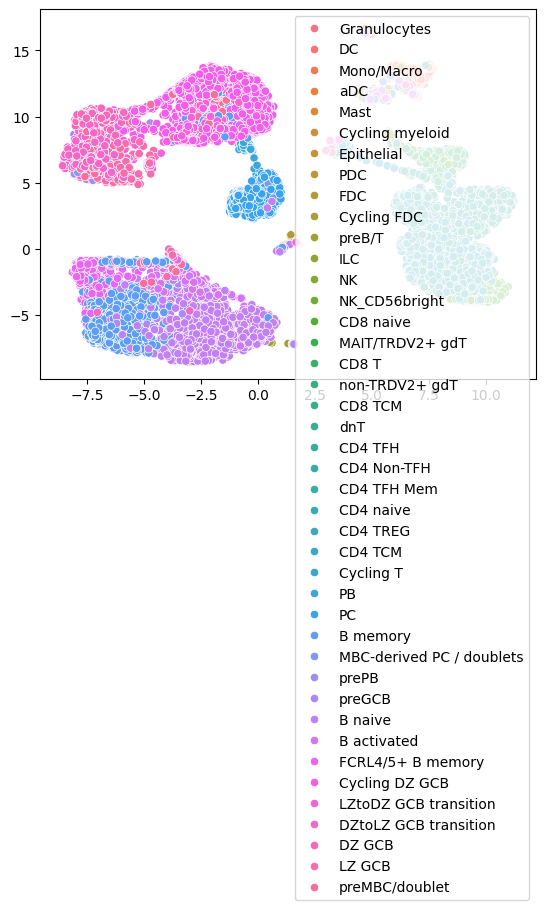

In [38]:
import seaborn as sns
sns.scatterplot(x=[e.x for e in embeddings], y=[e.y for e in embeddings], hue=labels);

In [40]:
# Running general DE will produce the diff_key which will
# be used later for getting heatmaps

diff_key = md.general_de(
    labelset=md.labelsets[0]
)
diff_key

'Y2VsbF90eXBlX2F6aW11dGg7Tm9uZTs0MjtiNDgyZjk4NTc5ZTUyZjIwZDUyZmU4MDNmYTk4NjRmNw=='

In [41]:
heatmap = md.heatmap(
    diff_key=diff_key,
    n_top_genes=3,
)

In [43]:
heatmap.model_dump().keys()

dict_keys(['obs_ids', 'annotations', 'is_in_selections', 'genes', 'scores', 'top_genes_by_selection', 'typename__'])

In [ ]:
# Highly variable genes list could get with:
md.highly_variable_genes(limit=10)

,gene_symbol,dispersion
0,HBB,7.861795
1,IGLL5,6.832189
2,SPRR3,6.516472
3,CXCL8,6.487165
4,FDCSP,6.388253
5,HBA2,6.278853
6,PI3,5.952504
7,S100A7,5.928604
8,CXCL5,5.920533
9,CCL4L2,5.825043
